# Importing History from Xopt CNSGA Generator
In this notebook, important all of the population files from the `output_path` feature in xopt's CNSGA generator into a ParetoBench `History` object will be demonstrated. This generator will save each of its populations into a CSV file in the specified path. With the CSV files and associated VOCS object, so we know the names of the variables, objectives, and constraints, we can load all data into the ParetoBench format.

In [1]:
from paretobench.plotting import history_obj_scatter
from electronsandstuff.paretobench.xopt import XoptProblemWrapper
from paretobench import Problem
from xopt import Xopt, Evaluator
from xopt.generators.ga.cnsga import CNSGAGenerator
import logging
import tempfile

from electronsandstuff.paretobench.xopt import import_cnsga_history

# Setup logging for xopt converter
logger = logging.getLogger("electronsandstuff.paretobench.xopt")
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)

2025-01-07 23:06:56,211 - INFO - Evaluating 64 generations in xopt:
2025-01-07 23:06:56,867 - INFO -   Complete!
2025-01-07 23:06:56,868 - INFO - Detected 64 population files out of 128 total files at "/tmp/tmpwfx3cu8r"
2025-01-07 23:06:56,958 - INFO - Successfully loaded History object in 0.09s: History(problem='WFG2 (k=2, m=2, n=16)', reports=64, vars=16, objs=2, cons=1)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='f0', ylabel='f1'>)

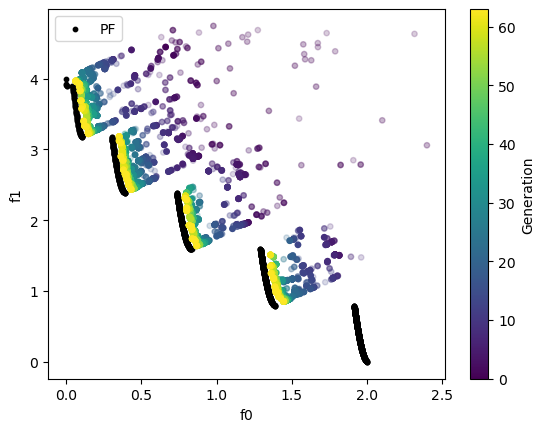

In [2]:
# Optimizer settings
population_size = 50
n_generations = 64

# Our test problem
prob = XoptProblemWrapper(Problem.from_line_fmt("WFG2 (n=16, k=2, m=2)"))

with tempfile.TemporaryDirectory() as output_path:
    # Setup NSGA-II in xopt to solve it
    ev = Evaluator(function=prob, vectorized=True, max_workers=population_size)
    X = Xopt(
        generator=CNSGAGenerator(
            vocs=prob.vocs, population_size=population_size, output_path=output_path
        ),
        evaluator=ev,
        vocs=prob.vocs,
    )
    X.strict = False

    # Run the optimizer
    logger.info(f"Evaluating {n_generations} generations in xopt:")
    for gen in range(n_generations):
        X.step()
    logger.info("  Complete!")

    # Import the data and plot
    hist = import_cnsga_history(
        output_path,
        vocs=prob.vocs,
        problem=prob.prob.to_line_fmt(),
        errors_as_constraints=True,
    )

# Plot the loaded objectives
history_obj_scatter(hist, show_pf=True)